# Stock Price Forecasting
**<h2> Using Tensor Flow and Deep Learning </h2>**
* **1. Introduction**
  * 1.1 Aim of the project
  * 1.2 Data Analytics Technqiues used in the project
  * 1.3 What is Deep Learning?
  * 1.4 Deep Learning Models used in this kernel
* **2. Data Cleaning and Analytics**
    * 2.1 Load data
    * 2.2 Check for missing values
    * 2.3 Finding max,min and std of each column
    * 2.4  Check if each predcitor column is normally distributed if not correct the skew
    * 2.5 Spearman's Rank-Order Correlation //find the strength of the relationship
    * 2.6 Logistic Regression // check if a variable can correctly predict the target
    Have done some parts but a shitload to do regardless
    Normalization, Check if there are any outlier how to deal with them is standardiztion of varibales necessary if so do it
* **3. Data Visualization** Strictly no copying from kernels atleast this early:-P
    * 3.1 Bar Plot of Class Column - Fraud vs Normal 
    * 3.2 Time vs Fraud...Do frauds occur at a particular time - Scatter plot
    * 3.3 Amount vs Fraud Are frauds particulary high for a certain amount -Scatter plot...any better alternatives try it
    * 3.4 Heatmap of a  Correlation Matrix -Search in net
    * 3.5 Put a barplot of the skewed amount and time columns
    * 3.6  Plot boxplots of strongly correlated columns and show the relationship
* **4. Selection of Machine Learning Model** we will do this together
    * 4.1 TBD
* **5. Training and Testing the Machine Learning Model**
    * 5.1 Predicting the test data using the trained RBF Kernel
    * 5.2 Labelling the Output and Submission
* **6. Reporting error of the model**
    * 6.1 Predicting the test data using the trained RBF Kernel
    * 6.2 Labelling the Output and Submission

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['merge.sh', 'all_stocks_5yr.csv', 'getSandP.py', 'individual_stocks_5yr']


Reading Data

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('../input/all_stocks_5yr.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Describe the dataset

In [4]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


Checking Null

In [5]:
print(df.isnull().values.any()) #checking if any columns has null value in df
print(df.isnull().any())#columns which have null values
print(df.isnull().sum().sum())#total no of null values
for col in df:
    print(col)
    print(format(df[col].unique()))

True
date      False
open       True
high       True
low        True
close     False
volume    False
Name      False
dtype: bool
27
date
['2013-02-08' '2013-02-11' '2013-02-12' ... '2018-02-05' '2018-02-06'
 '2018-02-07']
open
[15.07   14.89   14.45   ... 44.879  53.4747 72.405 ]
high
[15.12   15.01   14.51   ... 64.2776 65.525  72.9128]
low
[14.63   14.26   14.1    ... 70.995  71.465  73.1607]
close
[14.75  14.46  14.27  ... 27.535 27.215 29.318]
volume
[8407500 8882000 8126000 ... 2962031 4924323 4534912]
Name
['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 

Handle Missing Values

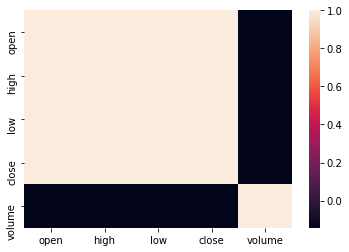

In [6]:
null_columns=df.columns[df.isnull().any()]
ndf=df.dropna(subset = null_columns)
ndf.isnull().sum()
ndf.index[-1]
import seaborn as sns
sns.heatmap(ndf.corr())

In [7]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

Using TensorFlow backend.


In [8]:
cl = ndf[ndf['Name']=='AAPL'].close
cl=cl.values
scaler = MinMaxScaler(feature_range=(0, 1))
cl=cl.reshape(-1, 1)
cl = scaler.fit_transform(cl)
# split into train and test sets
train_size = int(len(cl) * 0.8)
test_size = len(cl) - train_size
train, test = cl[0:train_size,:], cl[train_size:len(cl),:]
print(len(train), len(test))

1007 252


In [9]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 8s - loss: 0.0051
Epoch 2/100
 - 6s - loss: 5.2445e-04
Epoch 3/100
 - 6s - loss: 4.5828e-04
Epoch 4/100
 - 6s - loss: 3.9913e-04
Epoch 5/100
 - 6s - loss: 3.7283e-04
Epoch 6/100
 - 6s - loss: 3.6313e-04
Epoch 7/100
 - 6s - loss: 3.3591e-04
Epoch 8/100
 - 6s - loss: 3.1193e-04
Epoch 9/100
 - 6s - loss: 2.9525e-04
Epoch 10/100
 - 6s - loss: 2.9306e-04
Epoch 11/100
 - 6s - loss: 2.7781e-04
Epoch 12/100
 - 6s - loss: 2.7414e-04
Epoch 13/100
 - 6s - loss: 2.5203e-04
Epoch 14/100
 - 6s - loss: 2.5804e-04
Epoch 15/100
 - 6s - loss: 2.5962e-04
Epoch 16/100
 - 6s - loss: 2.5338e-04
Epoch 17/100
 - 6s - loss: 2.5425e-04
Epoch 18/100
 - 6s - loss: 2.4352e-04
Epoch 19/100
 - 6s - loss: 2.4411e-04
Epoch 20/100
 - 6s - loss: 2.4307e-04
Epoch 21/100
 - 6s - loss: 2.2907e-04
Epoch 22/100
 - 6s - loss: 2.3677e-04
Epoch 23/100
 - 6s - loss: 2.3441e-04
Epoch 24/100
 - 6s 

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.54 RMSE
Test Score: 6.53 RMSE


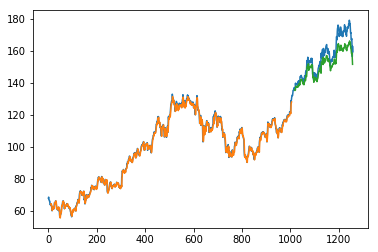

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(cl)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(cl)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(cl)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(cl))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()